<a id="ID_intr"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  



## 1.0 | INTRODUCTION

“How well-positioned are Post Offices to serve the newly bank-branch deprived?”: Examine the proximity of Post Office branches to closed bank branches. Assess whether Post Offices effectively fill the gap left by bank closures in terms of financial services accessibility.

This paper outlines the method and results of an exploratory Supervised Classification analysis of United Kingdom Banks and Building Society branches and their nearest Post Office(PO) which indicates that if there is any relation in the closure of these branches and the nearest post office loacted.
Retail Points (Banks) is a database of bank and building society branches which have been
attributed with store name, address including postcode, latitude and longitude, the Geolyti
seamless towns and localities, a close date where the branch is now permanently shut, a d
a distance to the nearest currently trading Post Offi
The tables lists
the current banks with the number of branches (current and closed). The closures have bee
tracked since 2015.ce.

Using open data from the respective suppliers, this paper proposCs a classification apprse).



### 1.1 | Requirements to run the analysis

An overview of packages used to run the analysis with brief explanation of their role.

First we will import relevant libraries
* `pandas` for data import and handling;
* `matplotlib`;
* `numpy`;
* `sklearn`;
* `statsmodels` for linear regression and VIF.

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV, validation_curve
from sklearn import preprocessing # Import label encoder
from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm

pd.set_option('display.max_rows', 50) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

In [17]:
import warnings
warnings.filterwarnings("ignore")

<a id="ID_lit"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 2.0 | Literature review

The retail banking sector in the United Kingdom has undergone significant changes, including branch closures. Competition and the presence of alternative banking facilities, such as Post Office branches, influence closure likelihood. However, these closures can disproportionately affect vulnerable communities, impacting access to financial services. Policymakers and institutions should consider these implications as they navigate the evolving landscape of retail banking. (Clark, 2023)

•	The UK retail banking market is characterized by a mix of traditional banks and building societies.
•	While the PRA recognizes a total of 160 banks and 43 building societies, the market is dominated by approximately 20 major players.
•	These major players include Barclays, Santander, NatWest, Lloyds Banking Group, and HSBC.
•	Together, they command a substantial 77% share of the retail banking marke(Bank of England, 2023)t.


Another study, conducted by the University of Sheffield's Centre for Research into Accounting and Finance in Context and the University of Bristol's Personal Finance Research Centre, reveals the impact of bank closures on Post Office services in the UK. One in ten UK Post Offices has been affected by a nearby bank closure within a 1km radius, leading to a 27% increase in demand for cash deposit services. Areas with a higher number of bank branches experienced a greater number of closures, predominantly in urban regions.
The closure of multiple bank branches in the same area resulted in a higher increase (58%) in Post Office deposit volumes. The study highlights that individuals and businesses seek alternative methods, such as Post Office services, for cash deposits when local banks close.  It underscores the importance of maintaining access to cash services, particularly in communities affected by bank closures (Bristol, 2022).



<a id="ID_research"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 3.0 | Research Question

“To what extent do Post Office services effectively mitigate the negative effects of bank branch closures, especially in rural areas, and how can their role be optimized to enhance financial inclusion?”

<a id="ID_data"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 4.0 | Data Loading and Exploration

This study uses bank operating information provided by the location analytics company Geolytix (Geolytix, 2021);
it contains a panel dataset from 2015 to 2021 on the bank branches that were open in 2015 and an indication if the
branch subsequently close
The entire dataset is available for download. [here](https://drive.google.com/file/d/1RjyAK7qa-qoKtU25KI4e-_mmdxW601tj/view).d.

Loading Retail Points of Bank

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
# Reading the csv file.

#bank_rp = pd.read_csv('data/uk_bank.csv')

bank_rp = pd.read_csv('/content/drive/MyDrive/uk_bank.csv')

#bank_rp = pd.read_csv('https://github.com/sameera006/Retail-Bank-PO/blob/master/data/uk_bank.csv')--i need to CORRECT it??
#https://drive.google.com/file/d/1RjyAK7qa-qoKtU25KI4e-_mmdxW601tj/view

In [20]:
bank_rp.head()

,id,brand_full,brand_short,branch_name,branch_type,add_one,add_two,suburb,town,region,...,hours_wednesday,hours_thursday,hours_friday,hours_saturday,trading_hours,status,close_month,close_year,po_dist,open_year
0,11210,TSB,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,The Salvation Army Centre,13 Church Street,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,"13,232.0000","2,023.0000"
1,10535,Royal Bank of Scotland,RBS,Kyle Mobile Branch,Mobile Branch,Harbour Slip Kyle IV40 8AF,NaN,NaN,Kyle of Lochalsh,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,151.0000,"2,022.0000"
2,10401,Royal Bank of Scotland,RBS,Lerwick,Branch,81 Commercial Street Lerwick ZE1 0AJ,NaN,NaN,Lerwick,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,129.0000,"2,022.0000"
3,10511,Royal Bank of Scotland,RBS,Armadale Mobile Branch,Mobile Branch,Ragamuffin shop Armadale IV45 8RQ,NaN,NaN,"Armadale, Highland, IV45",Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,137.0000,"2,022.0000"
4,10483,Royal Bank of Scotland,RBS,Appin Mobile Branch,Mobile Branch,Appin Village Hall (service paused) Appin PA38...,NaN,NaN,Appin,Scotland,...,NaN,NaN,NaN,NaN,NaN,Open,NaN,NaN,"3,306.0000","2,022.0000"


Here we are using the dataset of Retail points of bank of UK. Bank branches across the UK provide vital services and are often thought of as key ‘anchor’
services for the area they serve. Current branch information is available and online fr
everyone to access, and closures have been a matter of public reco. b the Retail Points (Banks) database contains information about bank and building society branches. This includes details like the branch’s name, address (including postcode), geographical coordinates (latitude and longitude), the date the branch permanently closed, and the distance to the nearest currently operating Post Office. Essentially, it’s a comprehensive record of banking locations and their relationships to nearby Post Offices.ce.se.

The above dataset contains these variables with their description.

![Screenshot 2024-04-13 141949.png](attachment:c694cc50-f736-403d-82ec-c97b491a8192.png)

**Basic Data Stats**

Before attempting to solve the problem, it's very important to have a good understanding of data.

The goal of this section is to:
- Get the dimensions of data
- Get various statistics of data

In [21]:
#Shape of the Dataframe
print(bank_rp.shape)

(11160, 25)


The dataset has 11160 rows and 25 columns.

In [22]:
# Calculating the Descriptive Statistics
bank_rp.describe(percentiles=[.05,0.95])

,id,long_wgs84,lat_wgs84,trading_hours,close_month,close_year,po_dist,open_year
count,"11,160.0000","11,159.0000","11,159.0000","6,268.0000","4,789.0000","5,397.0000","11,159.0000",974.0000
mean,"5,583.0669",-1.8826,52.9223,30.9269,6.8833,"2,019.3771",517.6233,"2,022.5082"
std,"3,225.9791",1.7348,1.8173,11.1935,2.8800,2.5321,"5,410.3740",0.5002
min,1.0000,-8.0919,49.1840,0.0833,1.0000,"2,015.0000",0.0000,"2,022.0000"
5%,558.9500,-4.9694,50.7901,1.0000,2.0000,"2,015.0000",29.0000,"2,022.0000"
50%,"5,580.5000",-1.7644,52.4805,34.0000,7.0000,"2,019.0000",155.0000,"2,023.0000"
95%,"10,607.0500",0.5233,56.4536,44.0000,11.0000,"2,023.0000",867.1000,"2,023.0000"
max,"11,227.0000",1.7544,60.1552,63.0000,12.0000,"2,024.0000","152,883.0000","2,023.0000"


**Data Cleaning and Analysis**

In [23]:
bank_rp.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11160 entries, 0 to 11159
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               11160 non-null  int64  
 1   brand_full       11160 non-null  object 
 2   brand_short      11160 non-null  object 
 3   branch_name      10370 non-null  object 
 4   branch_type      11160 non-null  object 
 5   add_one          10346 non-null  object 
 6   add_two          3986 non-null   object 
 7   suburb           7977 non-null   object 
 8   town             11136 non-null  object 
 9   region           10639 non-null  object 
 10  postcode         10982 non-null  object 
 11  long_wgs84       11159 non-null  float64
 12  lat_wgs84        11159 non-null  float64
 13  hours_monday     5885 non-null   object 
 14  hours_tuesday    5794 non-null   object 
 15  hours_wednesday  5686 non-null   object 
 16  hours_thursday   5695 non-null   object 
 17  hours_friday

**Calculating all NaNs and removing it.**

**COUNTING NULLS BY COLUMN**

In [24]:
bank_rp.isnull().sum(axis=0).sort_values(ascending=False)[:12]

open_year          10186
hours_saturday      9128
add_two             7174
close_month         6371
close_year          5763
hours_wednesday     5474
hours_thursday      5465
hours_tuesday       5366
hours_friday        5322
hours_monday        5275
trading_hours       4892
suburb              3183
dtype: int64

**Dropping those columns which have highest number of NULL and are not needed in our analysis. Additionally removing some columns like add_one, suburb, town.**

In [25]:
bank_rp.drop(columns=['brand_short','open_year','hours_saturday','add_one','add_two', 'suburb','town','hours_wednesday', 'hours_thursday','hours_friday','hours_monday', 'hours_tuesday', 'trading_hours'], inplace=True)

**COUNTING NULLS BY ROWS**

In [26]:
bank_rp.isnull().sum(axis=1).sort_values(ascending=False).head(20)

8199     4
8248     4
11136    4
8268     4
1132     4
8249     4
8247     4
7900     3
7907     3
7914     3
0        3
7871     3
7931     3
7945     3
7964     3
8000     3
7879     3
7841     3
7855     3
8020     3
dtype: int64

In [27]:
bank_rp.columns

Index(['id', 'brand_full', 'branch_name', 'branch_type', 'region', 'postcode',
       'long_wgs84', 'lat_wgs84', 'status', 'close_month', 'close_year',
       'po_dist'],
      dtype='object')

In `bank_rp`, there are two data types: categorical (aka `object`), and numerical (including `int64` and `float64`).

Before undertaking Classification, some data aprocessing should be done, which include:
- Converting categorical variables into dummy variables (aka one-hot encoding);
- Split the data into training and testing sets;

One note, the reason for doing one-hot encoding is that sklearn decision trees don't handle categorical data.

**Before using any  ML models we need to identify columns which we will be using in our analysis and if there are any missing values we will try to enrich the data and fill it with appropriate values.**

Now we all filling the region NaN value with columns who have same postcode.

In [28]:
bank_rp[bank_rp.region.isna()]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
0,11210,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,NaN,LN11 9BS,-6.5407,53.9508,Open,NaN,NaN,"13,232.0000"
663,10287,NatWest,St Helier,Branch,NaN,JE4 8NH,-2.1433,49.2177,Open,NaN,NaN,"148,786.0000"
1034,4560,Lloyds,Jersey - Five Oaks,Branch,NaN,JE2 7TY,-2.0829,49.1962,Open,NaN,NaN,"151,841.0000"
3084,10709,NatWest,Acton Banking Hub,Banking Hub,NaN,BS27 3RB,-0.2702,51.5077,Open,NaN,NaN,993.0000
4338,11115,Barclays,Local - Holt,Local Pod,NaN,NR25 6DN,1.0895,52.9045,Open,NaN,NaN,124.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
11135,10285,NatWest,St Brelade,Branch,NaN,JE3 8FX,-2.1985,49.1934,Open,NaN,NaN,"150,942.0000"
11136,10281,NatWest,Sark Post Office,Branch,NaN,NaN,-2.3512,49.4321,Open,NaN,NaN,"123,543.0000"
11146,10699,Virgin Money,Tobermory,Branch,NaN,PA75 6NU,-6.0673,56.6231,Open,NaN,NaN,323.0000
11152,10273,NatWest,St Helier,Branch,NaN,JE4 8PJ,-2.1021,49.1860,Open,NaN,NaN,"152,722.0000"


**So, we have 521 rows where region has NaN value.**

In [29]:
# taken a separate dataframe to store region
df1 = bank_rp[bank_rp.region.isna()]

In [30]:
bank_rp.region.unique()

array([nan, 'Scotland', 'South East', 'Northern Ireland', 'London',
       'North West', 'East Midlands', 'Yorkshire and The Humber',
       'West Midlands', 'Wales', 'Eastern', 'South West', 'North East'],
      dtype=object)

In [31]:
bank_rp['postcode'] = bank_rp['postcode'].replace('\s+', '', regex=True)

In [32]:
bank_rp['postcode']

0        LN119BS
1        IV408AF
2         ZE10AJ
3        IV458RQ
4        PA384BG
          ...   
11155     CR91PD
11156     G131LT
11157    PA427EL
11158    PA427DJ
11159     PR12AE
Name: postcode, Length: 11160, dtype: object

In [33]:
df2 = pd.DataFrame(bank_rp['region'])

In [34]:
df2['postcode'] = bank_rp['postcode']

In [35]:
df2.dropna(inplace = True)

In [36]:
df2

,region,postcode
1,Scotland,IV408AF
2,Scotland,ZE10AJ
3,Scotland,IV458RQ
4,Scotland,PA384BG
5,Scotland,PH414QT
...,...,...
11154,South West,BS13EU
11155,London,CR91PD
11156,Scotland,G131LT
11157,Scotland,PA427EL


In [37]:
# Imputing region based on postcode information

for ind in bank_rp[bank_rp.region.isna() == True].index:
    val = bank_rp.postcode[ind]
    for i in df2.index:
        if df2.postcode[i] == val:
            bank_rp.region[ind] = df2.region[i]
            break


Here we have tried to fill all regions with NULL value which has the same postcode.

In [38]:
bank_rp[bank_rp.region.isna()]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
0,11210,TSB,"Louth, The Salvation Army Centre",Pop Up Branch,NaN,LN119BS,-6.5407,53.9508,Open,NaN,NaN,"13,232.0000"
663,10287,NatWest,St Helier,Branch,NaN,JE48NH,-2.1433,49.2177,Open,NaN,NaN,"148,786.0000"
1034,4560,Lloyds,Jersey - Five Oaks,Branch,NaN,JE27TY,-2.0829,49.1962,Open,NaN,NaN,"151,841.0000"
3084,10709,NatWest,Acton Banking Hub,Banking Hub,NaN,BS273RB,-0.2702,51.5077,Open,NaN,NaN,993.0000
4338,11115,Barclays,Local - Holt,Local Pod,NaN,NR256DN,1.0895,52.9045,Open,NaN,NaN,124.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
11134,10280,NatWest,Cobo,Branch,NaN,GY57HA,-2.5970,49.4676,Open,NaN,NaN,"116,973.0000"
11135,10285,NatWest,St Brelade,Branch,NaN,JE38FX,-2.1985,49.1934,Open,NaN,NaN,"150,942.0000"
11136,10281,NatWest,Sark Post Office,Branch,NaN,NaN,-2.3512,49.4321,Open,NaN,NaN,"123,543.0000"
11146,10699,Virgin Money,Tobermory,Branch,NaN,PA756NU,-6.0673,56.6231,Open,NaN,NaN,323.0000


**It has reduced to 477 rows.**

In [39]:
bank_rp.brand_full

0                           TSB
1        Royal Bank of Scotland
2        Royal Bank of Scotland
3        Royal Bank of Scotland
4        Royal Bank of Scotland
                  ...          
11155                   NatWest
11156                Nationwide
11157    Royal Bank of Scotland
11158    Royal Bank of Scotland
11159                   NatWest
Name: brand_full, Length: 11160, dtype: object

In [40]:
bank_rp[(bank_rp.brand_full == 'Royal Bank of Scotland')]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
1,10535,Royal Bank of Scotland,Kyle Mobile Branch,Mobile Branch,Scotland,IV408AF,-5.7174,57.2802,Open,NaN,NaN,151.0000
2,10401,Royal Bank of Scotland,Lerwick,Branch,Scotland,ZE10AJ,-1.1412,60.1531,Open,NaN,NaN,129.0000
3,10511,Royal Bank of Scotland,Armadale Mobile Branch,Mobile Branch,Scotland,IV458RQ,-5.8990,57.0663,Open,NaN,NaN,137.0000
4,10483,Royal Bank of Scotland,Appin Mobile Branch,Mobile Branch,Scotland,PA384BG,-5.3564,56.5597,Open,NaN,NaN,"3,306.0000"
5,10507,Royal Bank of Scotland,Mallaig Mobile Branch,Mobile Branch,Scotland,PH414QT,-5.8287,57.0052,Open,NaN,NaN,59.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
11114,10730,Royal Bank of Scotland,Tarbert Council Offices Mobile Branch,Mobile Branch,NaN,HS33BG,-6.8142,57.9021,Open,NaN,NaN,"1,026.0000"
11115,10794,Royal Bank of Scotland,Berneray Mobile Branch,Mobile Branch,NaN,HS65BD,-7.1732,57.7174,Open,NaN,NaN,44.0000
11116,10789,Royal Bank of Scotland,Jura Care Centre Mobile Branch,Mobile Branch,NaN,PA607XG,-5.9472,55.8491,Open,NaN,NaN,"1,753.0000"
11157,10552,Royal Bank of Scotland,Port Ellen Mobile Branch,Mobile Branch,Scotland,PA427EL,-6.1820,55.6280,Open,NaN,NaN,337.0000


Here we are trying to look at the Bank and the status and finding if there is any relation with the particular Bank which is getting closed.
Another Research Question here can be framed - **Are some companies more likely to close branches than others?**

In [41]:
bank_rp[(bank_rp.brand_full == 'Royal Bank of Scotland') & (bank_rp.status == 'Closed')]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
15,7902,Royal Bank of Scotland,Fareham,Branch,South East,PO160LH,-1.1752,50.8520,Closed,8.0000,"2,018.0000",309.0000
45,10388,Royal Bank of Scotland,Milton Keynes,Branch,South East,MK93GB,-0.7571,52.0409,Closed,10.0000,"2,022.0000",641.0000
56,10389,Royal Bank of Scotland,Preston Fishergate,Branch,North West,PR12AE,-2.7022,53.7581,Closed,10.0000,"2,022.0000",156.0000
57,10385,Royal Bank of Scotland,Sheffield Church Street,Branch,Yorkshire and The Humber,S11HF,-1.4643,53.3815,Closed,10.0000,"2,022.0000",253.0000
75,8071,Royal Bank of Scotland,Lesmahagow,Mobile Branch,Scotland,NaN,-3.8868,55.6374,Closed,NaN,"2,022.0000",93.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
3708,9179,Royal Bank of Scotland,Broxburn,Branch,Scotland,EH525EE,-3.4693,55.9345,Closed,3.0000,"2,021.0000",122.0000
9131,7385,Royal Bank of Scotland,Dyce,Mobile Branch,Scotland,AB217NG,-2.1761,57.2044,Closed,NaN,"2,022.0000",873.0000
10539,7399,Royal Bank of Scotland,Stonehaven,Branch,Scotland,AB392QE,-2.2095,56.9641,Closed,10.0000,"2,017.0000","1,217.0000"
10601,7854,Royal Bank of Scotland,Port Charlotte,Mobile Branch,Scotland,PA487UA,-6.3776,55.7429,Closed,NaN,"2,022.0000",507.0000


Now we are going to look at other columns which are useful in our analysis and if they contain any null values.

In [42]:
bank_rp[bank_rp.brand_full.isna()]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist


In [43]:
bank_rp.branch_type

0        Pop Up Branch
1        Mobile Branch
2               Branch
3        Mobile Branch
4        Mobile Branch
             ...      
11155           Branch
11156           Branch
11157    Mobile Branch
11158    Mobile Branch
11159           Branch
Name: branch_type, Length: 11160, dtype: object

In [44]:
bank_rp[bank_rp.branch_type.isna()]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist


In [45]:
# Checking if there is any relation between types of branch and the status
bank_rp[(bank_rp.branch_type == 'Mobile Branch') & (bank_rp.status == 'Closed')]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
75,8071,Royal Bank of Scotland,Lesmahagow,Mobile Branch,Scotland,NaN,-3.8868,55.6374,Closed,NaN,"2,022.0000",93.0000
93,8085,Royal Bank of Scotland,Westhill,Mobile Branch,Scotland,NaN,-2.2783,57.1548,Closed,NaN,"2,022.0000",95.0000
254,8065,Royal Bank of Scotland,Arrochar,Mobile Branch,Scotland,NaN,-4.7451,56.1963,Closed,NaN,"2,022.0000",358.0000
255,8076,Royal Bank of Scotland,Lochgoilhead,Mobile Branch,Scotland,NaN,-4.9012,56.1710,Closed,NaN,"2,022.0000",97.0000
257,8080,Royal Bank of Scotland,Invergordon,Mobile Branch,Scotland,NaN,-4.1681,57.6883,Closed,NaN,"2,022.0000",54.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
10423,7353,NatWest,Hoveton,Mobile Branch,Eastern,NaN,1.4140,52.7146,Closed,NaN,"2,022.0000",472.0000
10424,7346,NatWest,Liskeard,Mobile Branch,South West,NaN,-4.4665,50.4536,Closed,NaN,"2,022.0000",172.0000
10425,7345,NatWest,Storrington,Mobile Branch,South East,NaN,-0.4550,50.9196,Closed,NaN,"2,022.0000",198.0000
10428,7363,NatWest,Freshwater,Mobile Branch,South East,NaN,-1.5057,50.6736,Closed,NaN,"2,022.0000","1,190.0000"


In [46]:
# Filter the DataFrame to include only closed branches
closed_branches = bank_rp[bank_rp['status'] == 'Closed']

# Calculate the sum of closed branches
sum_closed_branches = closed_branches['id'].count()

print("Sum of closed branches:", sum_closed_branches)


Sum of closed branches: 5254


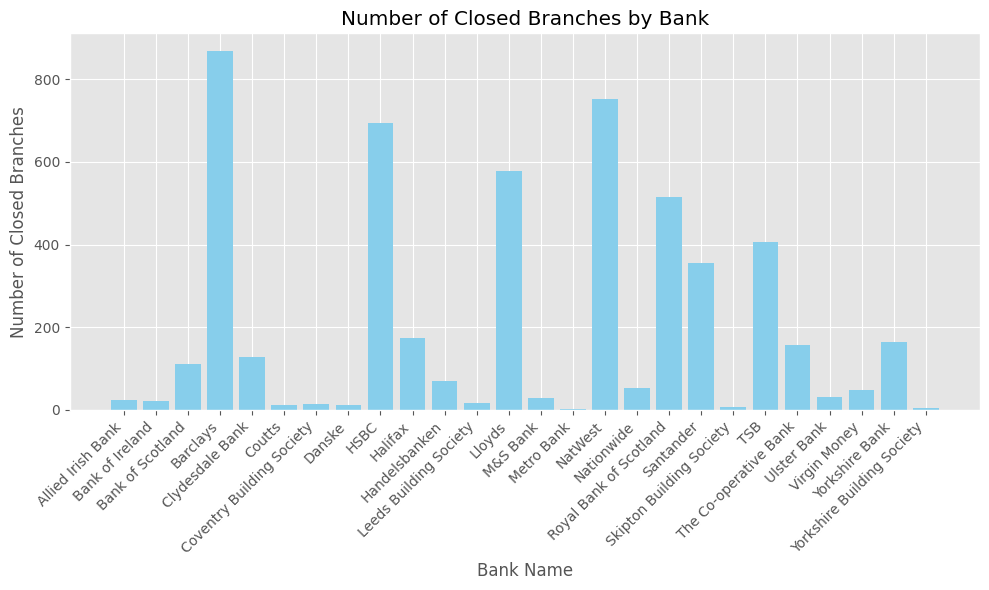

In [47]:
# Filter the DataFrame to include only closed branches
#closed_branches = bank_rp[bank_rp['status'] == 'Closed']

# Count the number of closed branches in each region
closed_branches_count = closed_branches.groupby('brand_full').size().reset_index(name='count')

# Create a bar graph
plt.figure(figsize=(10, 6))
plt.bar(closed_branches_count['brand_full'], closed_branches_count['count'], color='skyblue')
plt.xlabel('Bank Name')
plt.ylabel('Number of Closed Branches')
plt.title('Number of Closed Branches by Bank')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('CLOSED_Branches_Bank.png')
plt.show()

**Observations**
* The Bar-graph above show us clearly which branches are getting closed recently.
* The top three Branches are Barclays, NatWest and HSBC.
* However, we can also see many small branches are also getting closed so its not just big branches.

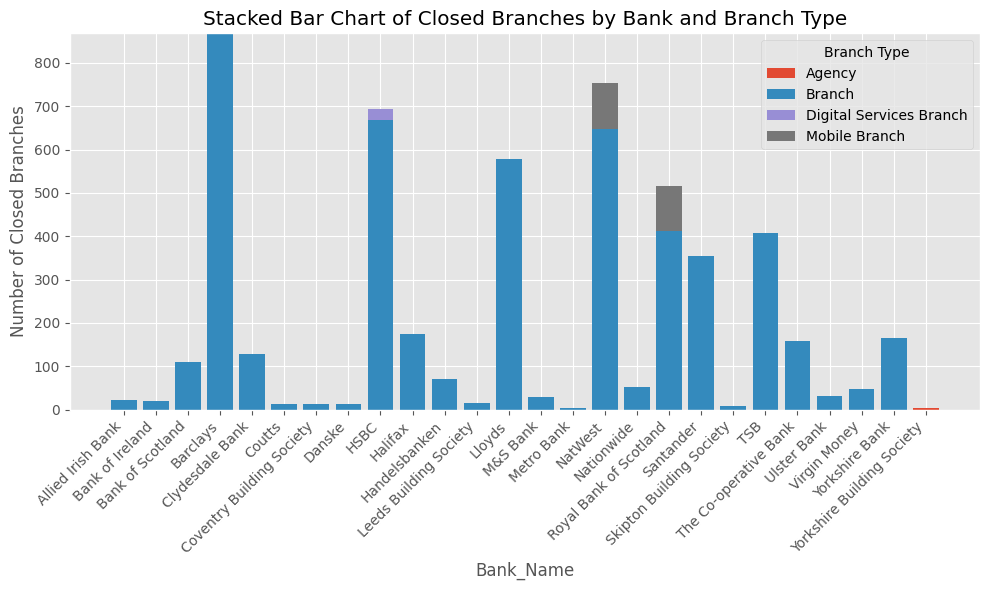

In [48]:
# Count the number of closed branches in each region and branch type
closed_branches_count = closed_branches.groupby(['brand_full', 'branch_type']).size().unstack(fill_value=0)

# Create a stacked bar graph
plt.figure(figsize=(10, 6))

for i, branch_type in enumerate(closed_branches_count.columns):
    plt.bar(closed_branches_count.index, closed_branches_count[branch_type], bottom=closed_branches_count.iloc[:, :i].sum(axis=1), label=branch_type)

plt.xlabel('Bank_Name')
plt.ylabel('Number of Closed Branches')
plt.title('Stacked Bar Chart of Closed Branches by Bank and Branch Type')
plt.legend(title='Branch Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Closed_Banks_Branch_Type.png')
plt.show()

**Observations**

* When we make a Stacked Bar Chart to see what type of branches are closed. So, there are four types of branches- Agency, Branch, Digital Services Branch and Mobile Branch. Mostly Main Branch are closed so which shows another pattern that its not necessary that only mobile branch are getting closed.

In [49]:
bank_rp[(bank_rp.branch_type == 'Branch') & (bank_rp.status == 'Closed')]

,id,brand_full,branch_name,branch_type,region,postcode,long_wgs84,lat_wgs84,status,close_month,close_year,po_dist
15,7902,Royal Bank of Scotland,Fareham,Branch,South East,PO160LH,-1.1752,50.8520,Closed,8.0000,"2,018.0000",309.0000
45,10388,Royal Bank of Scotland,Milton Keynes,Branch,South East,MK93GB,-0.7571,52.0409,Closed,10.0000,"2,022.0000",641.0000
56,10389,Royal Bank of Scotland,Preston Fishergate,Branch,North West,PR12AE,-2.7022,53.7581,Closed,10.0000,"2,022.0000",156.0000
57,10385,Royal Bank of Scotland,Sheffield Church Street,Branch,Yorkshire and The Humber,S11HF,-1.4643,53.3815,Closed,10.0000,"2,022.0000",253.0000
78,673,Barclays,NaN,Branch,East Midlands,DN226DQ,-0.9432,53.3231,Closed,8.0000,"2,021.0000",254.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
10627,4802,Lloyds,Carterton,Branch,South East,OX183AG,-1.5953,51.7600,Closed,9.0000,"2,017.0000",212.0000
10628,3019,HSBC,Wincanton,Branch,South West,BA99JW,-2.4098,51.0568,Closed,1.0000,"2,016.0000",158.0000
10635,6814,NatWest,St. Ives Cambs,Branch,Eastern,PE275AG,-0.0736,52.3237,Closed,6.0000,"2,018.0000",28.0000
10637,9451,TSB,Ramsey,Branch,Eastern,PE261HG,-0.1065,52.4491,Closed,3.0000,"2,021.0000",151.0000


So 5017 banks comes under closed branch which has the type Branch.

**For one hot encoding we will select columns to keep in our analysis and start the machine learning modelling.**

In [50]:
columns_to_keep = ['brand_full', 'branch_type', 'region', 'status', 'po_dist']

In [51]:
final_bank_rp = bank_rp[columns_to_keep]

In [52]:
final_bank_rp

,brand_full,branch_type,region,status,po_dist
0,TSB,Pop Up Branch,NaN,Open,"13,232.0000"
1,Royal Bank of Scotland,Mobile Branch,Scotland,Open,151.0000
2,Royal Bank of Scotland,Branch,Scotland,Open,129.0000
3,Royal Bank of Scotland,Mobile Branch,Scotland,Open,137.0000
4,Royal Bank of Scotland,Mobile Branch,Scotland,Open,"3,306.0000"
...,...,...,...,...,...
11155,NatWest,Branch,London,Open,55.0000
11156,Nationwide,Branch,Scotland,Closed,78.0000
11157,Royal Bank of Scotland,Mobile Branch,Scotland,Open,337.0000
11158,Royal Bank of Scotland,Mobile Branch,Scotland,Open,212.0000


In [53]:
# Drop the region column with na values.
final_bank_rp.drop(final_bank_rp[final_bank_rp.region.isna()].index.array, axis=0, inplace=True)

In [54]:
final_bank_rp

,brand_full,branch_type,region,status,po_dist
1,Royal Bank of Scotland,Mobile Branch,Scotland,Open,151.0000
2,Royal Bank of Scotland,Branch,Scotland,Open,129.0000
3,Royal Bank of Scotland,Mobile Branch,Scotland,Open,137.0000
4,Royal Bank of Scotland,Mobile Branch,Scotland,Open,"3,306.0000"
5,Royal Bank of Scotland,Mobile Branch,Scotland,Open,59.0000
...,...,...,...,...,...
11155,NatWest,Branch,London,Open,55.0000
11156,Nationwide,Branch,Scotland,Closed,78.0000
11157,Royal Bank of Scotland,Mobile Branch,Scotland,Open,337.0000
11158,Royal Bank of Scotland,Mobile Branch,Scotland,Open,212.0000


In [55]:
final_bank_rp[final_bank_rp.po_dist.isna()]

,brand_full,branch_type,region,status,po_dist
1132,Ulster Bank,Branch,Northern Ireland,Closed,NaN


In [56]:
# Drop the po_dist row with na values.
final_bank_rp.drop(final_bank_rp[final_bank_rp.po_dist.isna()].index.array, axis=0, inplace=True)

**So, now we have all the columns without any NULL values and which will help in our Analysis**
The columns are
* Bank Name - 'brand_full'
* Type of the Branch - 'branch_type'
* Region- 'region'
* Status -'status'
* Distance of the Post Office - 'po_dist'

In [57]:
# In status column we have three values which we should modify - closed/open/closing
final_bank_rp.status

1          Open
2          Open
3          Open
4          Open
5          Open
          ...  
11155      Open
11156    Closed
11157      Open
11158      Open
11159      Open
Name: status, Length: 10682, dtype: object

In [58]:
# Replace 'closing' with 'closed' in the 'status' column
final_bank_rp['status'] = final_bank_rp['status'].replace('Closing', 'Closed')

In [59]:
final_bank_rp['status'].unique()

array(['Open', 'Closed'], dtype=object)

In [60]:
final_bank_rp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 1 to 11159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   brand_full   10682 non-null  object 
 1   branch_type  10682 non-null  object 
 2   region       10682 non-null  object 
 3   status       10682 non-null  object 
 4   po_dist      10682 non-null  float64
dtypes: float64(1), object(4)
memory usage: 500.7+ KB


**Creating a function that will accept a DataFrame as input and return pie-charts for all the appropriate Categorical features. Clearly showing percentage distribution in the pie-chart.**

In [61]:
#function to create piecharts for all categorical columns
def pieplots(data):
    col_names = data.columns[pd.Series(data.columns).apply(lambda x : final_bank_rp[x].dtype == 'object')]
    for col in col_names:
        print('Pie of column',col)
        temp_data = data[col].value_counts()
        print(temp_data)
        plt.pie(temp_data, labels=temp_data.index, autopct='%.1f%%');
        plt.show()

Pie of column brand_full
brand_full
NatWest                           1469
Barclays                          1333
Lloyds                            1188
HSBC                              1028
Royal Bank of Scotland             914
Santander                          798
Halifax                            663
Nationwide                         657
TSB                                624
Bank of Scotland                   269
Yorkshire Building Society         231
Handelsbanken                      228
The Co-operative Bank              208
Virgin Money                       175
Yorkshire Bank                     165
Clydesdale Bank                    127
Skipton Building Society            99
Metro Bank                          79
Coventry Building Society           78
Leeds Building Society              66
Ulster Bank                         65
Allied Irish Bank                   45
Danske                              41
West Bromwich Building Society      37
Bank of Ireland             

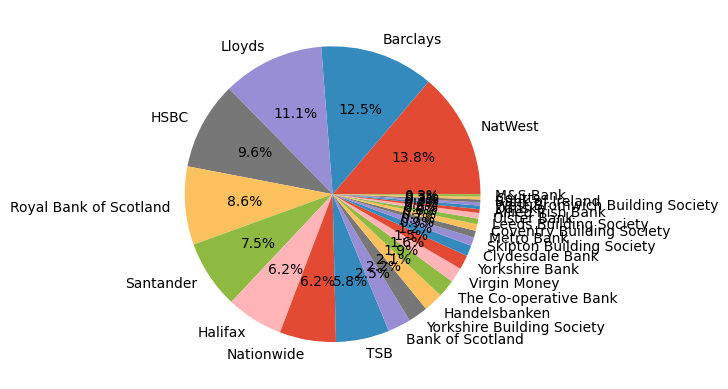

Pie of column branch_type
branch_type
Branch                     9732
Mobile Branch               731
Agency                      112
Digital Services Branch      76
Local Pod                    16
Banking Hub                   9
Pop Up Branch                 6
Name: count, dtype: int64


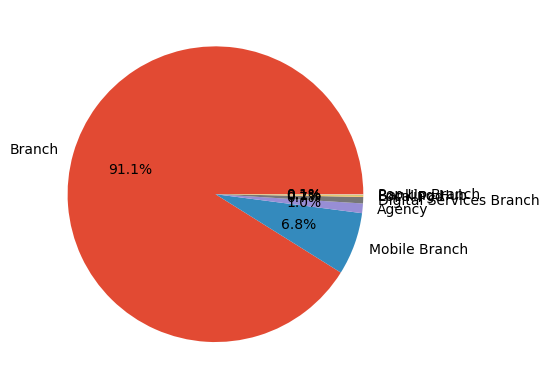

Pie of column region
region
Scotland                    1468
South East                  1434
London                      1275
North West                  1101
South West                  1026
Eastern                      848
Yorkshire and The Humber     838
West Midlands                830
Wales                        653
East Midlands                613
North East                   354
Northern Ireland             242
Name: count, dtype: int64


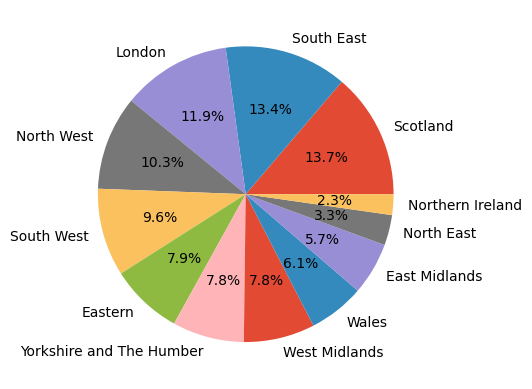

Pie of column status
status
Closed    5411
Open      5271
Name: count, dtype: int64


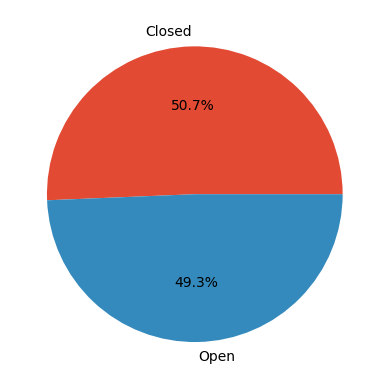

In [62]:
pieplots(final_bank_rp)   #calling function pieplots for creating pie charts of all categorical variables

**Observations**

* We already checked for the banks which are more in number like Natwest, Barclays, Llyods and HSBC.
* We have 91.11 % of main branch and 6.84 mobile branch.
* Regions having high branch is Scotland with 13.74%, South East 13.42% and London 11.94%.
* There are 50.66% of closed branches and 49.34% open branches.

### Converting categorical variables
First, we need to convert categorical variables into dummy/indicator variables, using `One-Hot Encoding`and 'Label Encoding'
Now we have checked all the columns.  
For the status we will do **Label encoding** as it has only two values open and closed and for the other three columns brand_full, branch_type, region we will do 'One-Hot Encoding`

In [63]:
print(final_bank_rp['brand_full'].unique())

['Royal Bank of Scotland' 'Barclays' 'NatWest' 'Danske' 'Virgin Money'
 'Metro Bank' 'Coutts' 'The Co-operative Bank'
 'Yorkshire Building Society' 'Ulster Bank' 'Handelsbanken'
 'Skipton Building Society' 'Nationwide' 'Coventry Building Society'
 'Leeds Building Society' 'Bank of Scotland' 'TSB' 'Lloyds' 'Halifax'
 'Santander' 'HSBC' 'Bank of Ireland' 'Yorkshire Bank' 'Clydesdale Bank'
 'Allied Irish Bank' 'West Bromwich Building Society' 'M&S Bank']


In [64]:
print(final_bank_rp['branch_type'].unique())
print(final_bank_rp['region'].unique())

['Mobile Branch' 'Branch' 'Agency' 'Digital Services Branch'
 'Pop Up Branch' 'Local Pod' 'Banking Hub']
['Scotland' 'South East' 'Northern Ireland' 'London' 'North West'
 'East Midlands' 'Yorkshire and The Humber' 'West Midlands' 'Wales'
 'Eastern' 'South West' 'North East']


**One-Hot Encoding**

In [65]:
final_bank_rp_encoded = pd.get_dummies(final_bank_rp, columns=['brand_full', 'branch_type', 'region'], drop_first =True, dtype = int)
# Use dtype = int because one-hot encoding was giving boolean value.

In [66]:
final_bank_rp_encoded.head()

,status,po_dist,brand_full_Bank of Ireland,brand_full_Bank of Scotland,brand_full_Barclays,brand_full_Clydesdale Bank,brand_full_Coutts,brand_full_Coventry Building Society,brand_full_Danske,brand_full_HSBC,...,region_London,region_North East,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Wales,region_West Midlands,region_Yorkshire and The Humber
1,Open,151.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,Open,129.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,Open,137.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,Open,"3,306.0000",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,Open,59.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [67]:
final_bank_rp_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 1 to 11159
Data columns (total 45 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   status                                     10682 non-null  object 
 1   po_dist                                    10682 non-null  float64
 2   brand_full_Bank of Ireland                 10682 non-null  int64  
 3   brand_full_Bank of Scotland                10682 non-null  int64  
 4   brand_full_Barclays                        10682 non-null  int64  
 5   brand_full_Clydesdale Bank                 10682 non-null  int64  
 6   brand_full_Coutts                          10682 non-null  int64  
 7   brand_full_Coventry Building Society       10682 non-null  int64  
 8   brand_full_Danske                          10682 non-null  int64  
 9   brand_full_HSBC                            10682 non-null  int64  
 10  brand_full_Halifax         

In [68]:
print(final_bank_rp_encoded['po_dist'].dtype)

float64


**Here we want to check if there are any outliers or not in po_dist because that is our numerical column.**

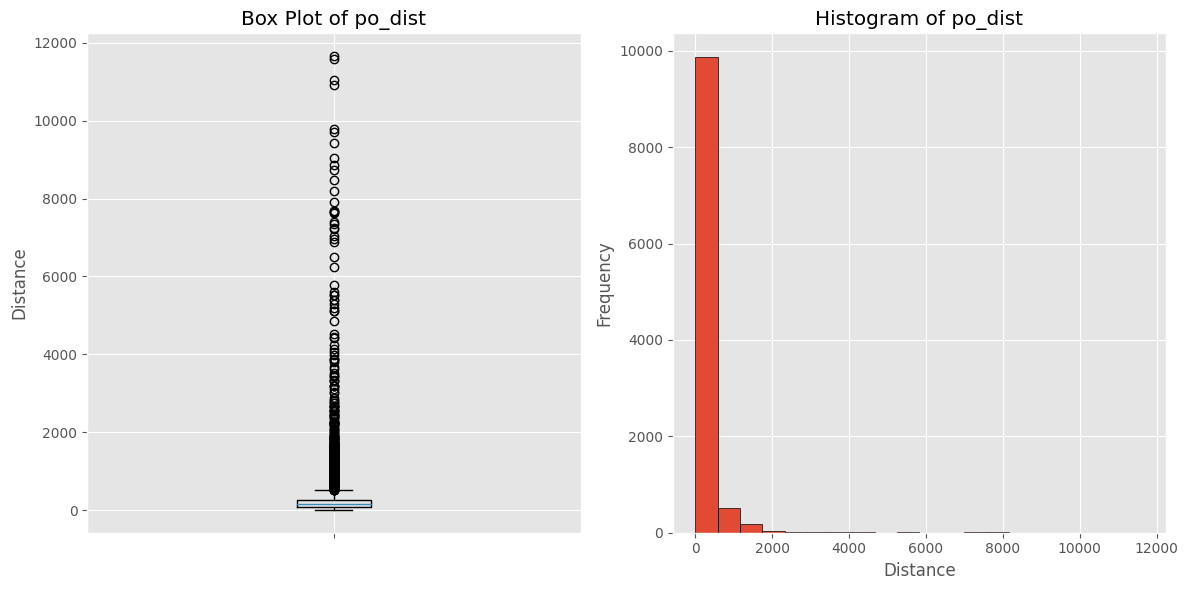

In [69]:
# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot a box plot
axs[0].boxplot(final_bank_rp_encoded['po_dist'])
axs[0].set_title('Box Plot of po_dist')
axs[0].set_ylabel('Distance')
axs[0].set_xticklabels([''])

# Plot a histogram
axs[1].hist(final_bank_rp_encoded['po_dist'], bins=20, edgecolor='black')
axs[1].set_title('Histogram of po_dist')
axs[1].set_xlabel('Distance')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [70]:
final_bank_rp_encoded.po_dist.describe()

count                                10,682.0000
mean                                    264.9850
std                                     551.6122
min                                       0.0000
25%                                      85.0000
50%                                     152.0000
75%                                     261.0000
max                                  11,661.0000
Name: po_dist, dtype: float64

**Observations**

1. The box-plot and histogram shows a number of outliers roughly with values above 75th percentile. These outliers may introduce bias in the data. Therefore these outliers have to be removed or treated.
   
2. As we are looking at branches which have been closed based on distance. Typically if a post-office is closer to the branch there is high chance for bank to decide to closed down the branch and offer transaction to customers through Post Office. Assuming that this is true removing these outliers may not impact the decision to close the branch based on distance from Post Office.

**Removing Outliers from po_dist column.**

In [71]:
# Calculate Q1, Q3, and IQR
Q1 = final_bank_rp_encoded['po_dist'].quantile(0.25)
Q3 = final_bank_rp_encoded['po_dist'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
final_bank_rp_encoded = final_bank_rp_encoded[(final_bank_rp_encoded['po_dist'] >= lower_bound) & (final_bank_rp_encoded['po_dist'] <= upper_bound)]


In [72]:
final_bank_rp_encoded.po_dist.describe()

count                                 9,755.0000
mean                                    163.4019
std                                     110.6785
min                                       0.0000
25%                                      79.0000
50%                                     139.0000
75%                                     223.0000
max                                     525.0000
Name: po_dist, dtype: float64

**Standardizing the distance column**

In [73]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the 'po_dist' column and transform it
final_bank_rp_encoded['po_dist'] = scaler.fit_transform(final_bank_rp_encoded[['po_dist']])

In [74]:
final_bank_rp_encoded.po_dist.describe()

count                                 9,755.0000
mean                                      0.0000
std                                       1.0001
min                                      -1.4764
25%                                      -0.7626
50%                                      -0.2205
75%                                       0.5385
max                                       3.2673
Name: po_dist, dtype: float64

In [75]:
# label_encoder object knows
# how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
final_bank_rp_encoded['status']= label_encoder.fit_transform(final_bank_rp_encoded['status'])

final_bank_rp_encoded['status'].unique()

array([1, 0])

In [76]:
final_bank_rp_encoded

,status,po_dist,brand_full_Bank of Ireland,brand_full_Bank of Scotland,brand_full_Barclays,brand_full_Clydesdale Bank,brand_full_Coutts,brand_full_Coventry Building Society,brand_full_Danske,brand_full_HSBC,...,region_London,region_North East,region_North West,region_Northern Ireland,region_Scotland,region_South East,region_South West,region_Wales,region_West Midlands,region_Yorkshire and The Humber
1,1,-0.1121,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,-0.3108,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,-0.2386,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5,1,-0.9433,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6,1,-1.0066,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11155,1,-0.9795,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
11156,0,-0.7717,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11157,1,1.5686,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11158,1,0.4391,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


<a id="ID_Method"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_Intro)  

## 5.0 | Methodology

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features.

DecisionTreeClassifier is a class capable of performing multi-class classification on a dataset.

As with other classifiers, DecisionTreeClassifier takes as input two arrays: an array X, sparse or dense, of shape (n_samples, n_features) holding the training samples, and an array Y of integer values, shape (n_samples,), holding the class labels for the training sames. es

**Splitting data into random train and test subsets**

By default, `train_test_split` will split the data according to a 75:25 split.
The split should be random in order to avoid selection bias. Here, we set random_state=100 to guarantee reproducibility.
Here we input two dataframes (X and Y) and will get four outputs (train_x, test_x, train_y, test_y).

In [77]:
random_state_split = 100
train_x, test_x, train_y, test_y = train_test_split(final_bank_rp_encoded.drop(['status'], axis = 1), final_bank_rp_encoded.status, random_state=random_state_split)

Double check the rows and columns of the outputs.

In [78]:
print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

# check the index of train_x and train_y - they should be identical. The index indicates which rows from the original data.

print(train_x.index.identical(train_y.index))
print(test_x.index.identical(test_y.index))

(7316, 44)
(7316,)
(2439, 44)
(2439,)
True
True


**The Dependant variable (y) here is closed and open labeled as 0 and 1. So we are using *Decision Tree Classifier*.**

In [79]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state = 5)
# Train Decision Tree Classifer
clf = clf.fit(train_x,train_y)

In [80]:
#Predict the response for test dataset
y_pred = clf.predict(test_x)

In [81]:
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred)) # so everytime i run this the value changes.

Accuracy: 0.6383763837638377


We got a classification rate of 63.38%, which is considered as good accuracy. You can improve this accuracy by tuning the parameters in the decision tree algorithm.

**Tuning hyperparameters of the ML model**

In machine learning, hyperparameters are the model settings predefined by the user, e.g. maximum height of the decision tree.

The best hyperparametrs are subjective and differs for every dataset.

**Optimizing Decision Tree Performance parameters**

**criterion** : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure.
Supported criteria are **“gini”** for the Gini index and **“entropy”** for the information gain.

**splitter** : string, optional (default=”best”) or Split Strategy. This parameter allows us to choose the split strategy. Supported strategies are **“best”** to choose the best split and **“random”** to choose the best random split.

**max_depth** : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting.

**RandomizedSearchCV**
<br>[here]https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html<br>

In [82]:
#Here we are using RandomizedSearchCV, it implements a “fit” and a “score” method.
#The parameters of the estimator used to apply these methods are optimized by cross-validated
from sklearn.model_selection import RandomizedSearchCV

In [83]:
from scipy.stats import randint #The randint() method returns an integer number selected element from the specified range.

In [84]:
# Create Decision Tree classifer object
clf_tune = DecisionTreeClassifier(random_state = 5)

In [85]:
#parameters for hyperparameter initialisation
params = {
            'criterion': ['gini', 'entropy', 'log_loss']
            , 'splitter': ['best','random']
            , 'max_depth': randint(2,50)
            , 'max_features': ['auto','sqrt','log2',None]
            , 'class_weight': ['balanced',None]
        }

In [86]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(clf_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [87]:
random_search.fit(train_x,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=5),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'class_weight': ['balanced', None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c670f16ebc0>,
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'splitter': ['best', 'random']},
                   random_state=5, scoring='accuracy', verbose=3)

In [88]:
#predicted best parameter
random_search.best_params_

{'class_weight': None,
 'criterion': 'log_loss',
 'max_depth': 17,
 'max_features': 'sqrt',
 'splitter': 'best'}

In [89]:
random_search.best_estimator_

DecisionTreeClassifier(criterion='log_loss', max_depth=17, max_features='sqrt',
                       random_state=5)

In [90]:
clf_tune = random_search.best_estimator_

# Train Decision Tree Classifer
clf_tune = clf_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = clf_tune.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
#After Tuning the accuracy has decreased.

Accuracy: 0.6650266502665027


Here we can see that after tuning the Classification Accuracy has increased to 66.50 which is an improved rate than the previous model.

**To Check more Model we will use Random Forest Classifier**

In [91]:
# import Random Forest classifier

from sklearn.ensemble import RandomForestClassifier

# instantiate the classifier

rfc = RandomForestClassifier(random_state=5)

# fit the model

rfc.fit(train_x,train_y)

RandomForestClassifier(random_state=5)

In [92]:
# Predict the Test set results

y_pred = rfc.predict(test_x)

# Check accuracy score

from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(test_y, y_pred)))

Model accuracy score with 10 decision-trees : 0.6412


For tuning RF the parameters added here are

In [124]:
# Create Random Forest Classifer object
rfc_tune = RandomForestClassifier(random_state=5)

In [125]:
from scipy.stats import uniform

In [126]:
#parameters for hyperparameter initialisation
params = {
            'n_estimators': randint(10,200)
            , 'criterion': ['gini','entropy','log_loss']
            , 'max_depth': randint(2,30)
            , 'max_features': ['sqrt','log2',None]
            , 'bootstrap': [True,False]
            , 'class_weight': ['balanced','balanced_subsample',None]
            , 'max_samples': uniform(0.0,1.0)
        }

In [127]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(rfc_tune, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [128]:
random_search.fit(train_x,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(random_state=5),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'class_weight': ['balanced',
                                                         'balanced_subsample',
                                                         None],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c6712e93fd0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'max_samples': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7c67132d3760>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c6712e92b90>},
                   random_state=5, scoring='accuracy', verbose=3)

In [129]:
#predicted best parameter
random_search.best_params_

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'max_samples': 0.13436372785235862,
 'n_estimators': 84}

In [130]:
random_search.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       max_samples=0.13436372785235862, n_estimators=84,
                       random_state=5)

In [131]:
rfc_tune = random_search.best_estimator_

# Train Decision Tree Classifer
rfc_tune = rfc_tune.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = rfc_tune.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
#After Tuning the accuracy has decreased.

Accuracy: 0.6769167691676917


So, after tuning and taking the best hyperparametrs we get an improved accuracy score to **68.47.**

 **Train a model using XGBoost.**

Now we are training the Model using XGBoost. It is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way.

In [95]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
from xgboost import XGBClassifier

In [97]:
xgb1 = XGBClassifier(nthread = -1, random_state=5)
xgb1.fit(train_x, train_y)
xgb1

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [98]:
y_pred = xgb1.predict(test_x)

In [99]:
print('Train data accuracy:', xgb1.score(train_x, train_y))
print('Test data accuracy:' ,xgb1.score(test_x, test_y))

Train data accuracy: 0.7707763805358119
Test data accuracy: 0.6777367773677737


So, we can see here that by using XGBoost the test accuracy has improved to 67.77%. To improve the predictions further we can tune it using RandomizedSearchCV.

In [100]:
# Create Decision Tree classifer object
xgb1 = XGBClassifier(nthread = -1, random_state=5)

In [101]:
#parameters for hyperparameter initialisation
params = {
            'learning_rate' : [0.05,0.10,0.15,0.20,0.25,0.30],
            'max_depth' : randint(2,50),   #[3,4,5,6,7,8,9,10,11,12,13,14,15],
            'min_child_weight' : randint(1,10), #[1,3,5,7],
            'gamma' : [0.0,0.1,0.2,0.3,0.4],
            'colsample_bytree' : [0.3,0.4,0.5,0.6,0.7]
        }

In [102]:
#creating instance for RandomizedSearchCV
random_search = RandomizedSearchCV(xgb1, param_distributions=params, n_iter=50, scoring='accuracy', n_jobs=-1, cv=10, verbose=3, random_state=5)

In [103]:
random_search.fit(train_x,train_y)

Fitting 10 folds for each of 50 candidates, totalling 500 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rat...
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5, 0.6,
                                                             0.7],
                                        'gamma': [0.0, 0.1, 0.2, 0.3, 0.4],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2,
                                                          0.25, 0.3],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c670ed7ed40>,
                                        'min_child_weight': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7c670ed7e2f0>},
                   random_state=5, scoring='accuracy', verbose=3)

In [104]:
#predicted best parameter
random_search.best_params_

{'colsample_bytree': 0.5,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 2,
 'min_child_weight': 1}

In [105]:
random_search.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.5, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [106]:
# Create Decision Tree classifer object
#clf = DecisionTreeClassifier(class_weight=None, criterion='log_loss', max_depth= 17, max_features='sqrt', splitter='best', random_state=5)
#clf = DecisionTreeClassifier(class_weight=None, criterion='log_loss', max_depth=16, max_features=None, splitter='best', random_state=5)
xgb1 = random_search.best_estimator_

# Train Decision Tree Classifer
xgb1 = xgb1.fit(train_x,train_y)

#Predict the response for test dataset
y_pred = xgb1.predict(test_x)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_y, y_pred))
#After Tuning the accuracy has decreased.

Accuracy: 0.6847068470684707


Confusion Matrix


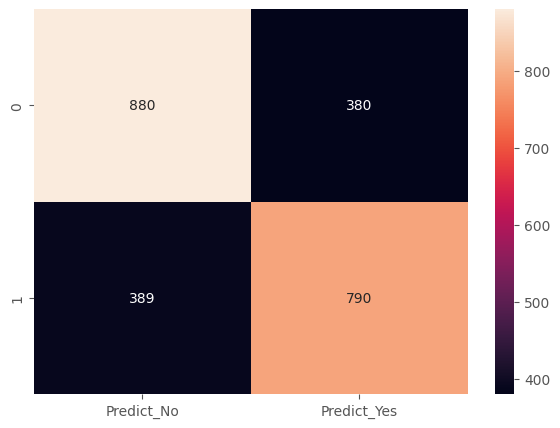

In [107]:
import seaborn as sns
print("Confusion Matrix")
cm = metrics.confusion_matrix(test_y, y_pred, labels=[0,1])
cm
df_cm = pd.DataFrame(cm, index = [i for i in [0,1]], columns = [i for i in ['Predict_No','Predict_Yes']])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True,fmt='d');

**Model is predicting status 790 times (TP), 389 (FN) misclassifications and 880 (TN) and 380 (FP) misclassifications.**

In [108]:
print("Classification Report")
print(metrics.classification_report(test_y, y_pred, labels=[0,1]))

Classification Report
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      1260
           1       0.68      0.67      0.67      1179

    accuracy                           0.68      2439
   macro avg       0.68      0.68      0.68      2439
weighted avg       0.68      0.68      0.68      2439



LIMITATIONS-
we can also see which year has maximum closed branches and maybe because of recession or COVID-19 and any particular month where the branches are closed.

<a id="ID_biblio"></a>
| [1.0 Intro](#ID_intr) | [2.0 Lit. review](#ID_lit) | [3.0 Research Quest.](#ID_research) | [4.0 Data](#ID_data) | [5.0 Methodology]("#ID_Method) | [6.0 Results]("#section_ID") | [7.0 Discussion](#ID_Intro) | [Bibliography](#ID_biblio)  

***
## Bibliography

* Which firms does the PRA regulate? (2023) Bank of England. Available at: https://www.bankofengland.co.uk/prudential-regulation/authorisations/which-firms-does-the-pra-regulate (Accessed: 13 April 2024).
  

* Clark, S., Newing, A., Hood, N. & Birkin, M. (2023) Retail banking closures in the United Kingdom. Are neighbourhood characteristics associated with retail bank branch closures? Transactions of the Institute of British Geographers, 00, 1–20. Available from: https://doi.org/10.1111/tran.12656

* Sklearn.model_selection.RANDOMIZEDSEARCHCV (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html (Accessed: 16 April 2024).

* Treasury, H. (2022) New powers to protect access to cash, GOV.UK. Available at: https://www.gov.uk/government/news/new-powers-to-protect-access-to-cash (Accessed: 12 April 2024). .
* University of Bristol (2022) Bank closures drive people to the post office to handle cash, September: Bank closure impact on Post Offices | News and features | University of Bristol. Available at: https://www.bristol.ac.uk/news/2022/september/bank-closure-impact-on-post-offices.html (Accessed: 12 April 2024).

  
